#### Bộ dữ liệu GDP list chứa dữ liệu dự báo về GDP của một số quốc gia, các thông tin được thống kê bao gồm:<br>

Country: Tên quốc gia<br>
Continent: Tên châu lục<br>
GDP (millions of US$): GDP tính theo đơn vị triệu USD<br>

1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.<br>
2. Việt hóa tên các cột trong bảng dữ liệu: Country 🡪 Nuoc; Continent 🡪 Chauluc; GDP (millions of US$) 🡪 GDP (trieu $)<br>
3. Chèn thêm một cột “Thanhpho” vào sau cột “Nuoc”, giá trị ban đầu là giá trị của cột “Nuoc”    <br>
4. Trong cột Thanhpho, thay giá trị Vietnam thành Hanoi; Làm tương tự với các nước còn lại.<br>
5. Xóa các bản ghi có Chauluc là ‘Asia’<br>
6. Xóa các bản ghi có GDP < 300000<br>
7. Tính giá trị lớn nhất và nhỏ nhất của GDP.<br>
8. Hãy cho biết xu hướng phân bố dữ liệu của GDP.<br>
9. Hãy cho biết châu lục nào xuất hiện nhiều nhất?<br>
10. Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.<br>
11. So sánh GDP các nước ở South America.<br>
12. Đánh giá tỉ lệ đóng góp GDP của Việt Nam trên tổng số GDP của 5 nước Đông Nam Á là Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.<br>
13. Biểu đồ để hiển thị giá trị cụ thể và so sánh GDP các nước Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.<br>
14. Biểu đồ để đánh giá tỉ lệ đóng góp GDP của các nước trên tổng số GDP của 5 nước Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.<br>
15. Vẽ biểu đồ phân bố giá trị GDP toàn cầu, châu Á<br>
16. Vẽ biểu đồ box plot nhóm theo châu lục <br>

#### 1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.

In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('GDPlist.csv', encoding = 'unicode_escape')
data.head(5)

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [3]:
data.shape

(125, 3)

Dữ liệu có 125 hàng, 3 cột, không bị khuyết thiếu

#### 2. Việt hóa tên các cột trong bảng dữ liệu: Country 🡪 Nuoc; Continent 🡪 Chauluc; GDP (millions of US$) 🡪 GDP (trieu $)

In [4]:
data.rename(columns={'Country':'Nuoc','Continent':'Chauluc','GDP (millions of US$)':'GDP (trieu $)'}, inplace=True)
data.head(2)

,Nuoc,Chauluc,GDP (trieu $)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847


#### 3. Chèn thêm một cột “Thanhpho” vào sau cột “Nuoc”, giá trị ban đầu là giá trị của cột “Nuoc”  

In [5]:
data.insert(1, 'Thanhpho', data['Nuoc'],True)
data.head(2)

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
0,Afghanistan,Afghanistan,Asia,18181
1,Albania,Albania,Europe,12847


#### 4. Trong cột Thanhpho, thay giá trị Vietnam thành Hanoi; Làm tương tự với các nước còn lại.

In [6]:
data['Thanhpho']=data['Thanhpho'].str.replace('Vietnam', 'Hanoi')
data

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
0,Afghanistan,Afghanistan,Asia,18181
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644
...,...,...,...,...
120,Uzbekistan,Uzbekistan,Asia,45353
121,Venezuela,Venezuela,South America,315841
122,Vietnam,Hanoi,Asia,122722
123,Yemen,Yemen,Africa,33675


#### 5. Xóa các bản ghi có Chauluc là ‘Asia’<br>6. Xóa các bản ghi có GDP < 300000

In [7]:
data.drop(data[data['Chauluc']=='Asia'].index, inplace=True)
data.drop(data[data['GDP (trieu $)']<300000].index, inplace=True)

### Thực hành phân tích các giá trị thống kê của biến định tính, định lượng; Pivot table, Hợp nhất dữ liệu. 

In [8]:
import pandas as pd
data = pd.read_csv('GDPlist.csv', encoding = 'unicode_escape')
data.head(5)

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


#### 7. Tính giá trị lớn nhất và nhỏ nhất của GDP.

In [9]:
print('Giá trị nhỏ nhất của GDP: ', data.iloc[:,2].min())
print('Giá trị lớn nhất của GDP: ', data.iloc[:,2].max())

Giá trị nhỏ nhất của GDP:  10600
Giá trị lớn nhất của GDP:  15094025


#### 8. Hãy cho biết xu hướng phân bố dữ liệu của GDP. <br> 9. Hãy cho biết châu lục nào xuất hiện nhiều nhất?<br>

Biến dữ liệu định tính

In [10]:
data_country = data.loc[:,'Continent']
data_country.mode()

0    Europe
Name: Continent, dtype: object

The continent has the most numbers of contries is Europe

In [11]:
data_country.value_counts()

Europe           37
Asia             36
Africa           29
North America    11
South America     9
Oceania           3
Name: Continent, dtype: int64

Biến dữ liệu định lượng

In [12]:
data.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


In [13]:
data['GDP (millions of US$)'].median()

96089.0

In [14]:
data['GDP (millions of US$)'].mean()

555427.784

=> Lệch trái

#### 10. Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.

In [15]:
table_1 = data.pivot_table(values='GDP (millions of US$)', index='Continent', aggfunc='sum')
table_1.rename(columns={'GDP (millions of US$)': 'Total of GDP'},inplace= True)
table_2 = data.pivot_table(values='GDP (millions of US$)', index='Continent', aggfunc='mean')
table_2.rename(columns={'GDP (millions of US$)': 'Average of GDP'},inplace= True)
table_new = pd.concat([table_1, table_2], axis=1)
table_new

,Total of GDP,Average of GDP
Continent,,
Africa,1820811,6.278659e+04
Asia,24425891,6.784970e+05
Europe,19139380,5.172805e+05
North America,18238447,1.658041e+06
Oceania,1662727,5.542423e+05
South America,4141217,4.601352e+05


#### 11. So sánh GDP các nước ở South America.<br>

In [16]:
data1 = data[data['Continent']=='South America'][['Country', 'GDP (millions of US$)']]
data1

,Country,GDP (millions of US$)
4,Argentina,447644
15,Brazil,2492908
22,Chile,248411
24,Colombia,328422
34,Ecuador,66381
86,Paraguay,21236
87,Peru,173502
119,Uruguay,46872
121,Venezuela,315841


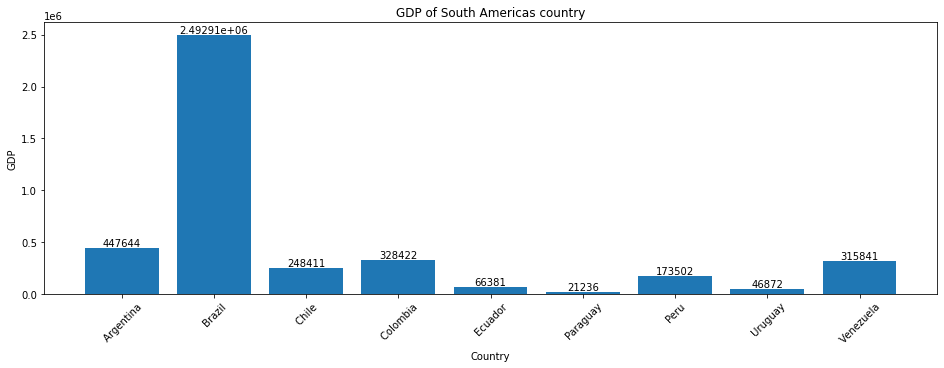

In [17]:
import matplotlib.pyplot as plt
plt.bar(x=data1['Country'].values, height=data1['GDP (millions of US$)'])
plt.title('GDP of South Americas country')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45)
ax = plt.gca()
fix = plt.gcf()
fix.set_size_inches (16,5)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### 12. Đánh giá tỉ lệ đóng góp GDP của Việt Nam trên tổng số GDP của 5 nước Đông Nam Á là Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.<br>

In [18]:
data2 = data[data['Continent']=='Asia'][['Country', 'GDP (millions of US$)']]
# data2.set_index(['Country'], inplace=True)
# data2 = data2[(data2['Country'] == 'Vietnam')]
# data2[(data2['Country'] == '\xa0Vietnam')]
# data2 = data2.loc[['\xa0Malaysia','\xa0Vietnam', '\xa0Indonesia', '\xa0Thailand', '\xa0Cambodia']]
# data2['Country'].values
# plt.pie(data2.index, data2.values)

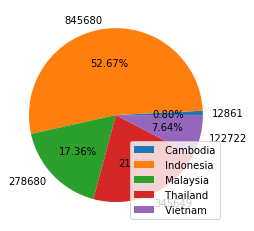

In [19]:
data2 = data2[(data2['Country'] == '\xa0Vietnam') | (data2['Country'] == '\xa0Indonesia') |
             (data2['Country'] == '\xa0Cambodia') | (data2['Country'] == '\xa0Thailand')|
             (data2['Country'] == '\xa0Malaysia')]
size = data2['GDP (millions of US$)'].values
label = data2['Country'].values
plt.pie(size, labels = size, autopct='%1.2f%%')
plt.legend(label, loc='lower right')
plt.show()

Biểu đồ để đánh giá tỉ lệ đóng góp GDP của các nước trên tổng số GDP của 5 nước Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.

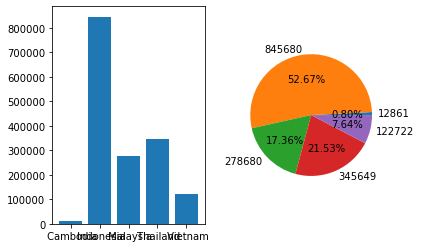

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].bar(label, size)
ax[1].pie(size, labels = size, autopct='%1.2f%%')
fix.set_size_inches (16,5)
plt.show()

#### 15. Biểu đồ phân bố giá trị GDP toàn cầu, châu Á

<AxesSubplot:ylabel='GDP (millions of US$)'>

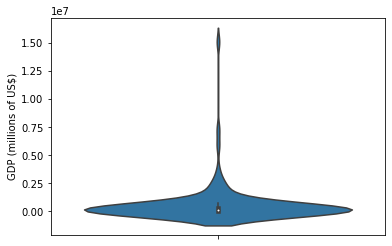

In [21]:
sns.violinplot(y = data['GDP (millions of US$)'])

Có thể nhận thấy giá trị GDP phân tập trung ở giá trị < 2500000, số lượng các nước có GDP cao hơn ít hơn rất nhiều


<AxesSubplot:ylabel='GDP (millions of US$)'>

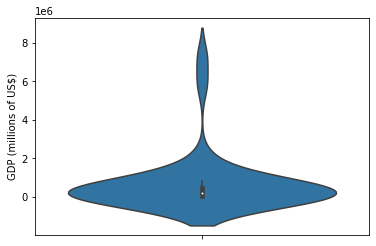

In [22]:
sns.violinplot(y = data[data['Continent']=='Asia']['GDP (millions of US$)'])

GDP các nước châu Á có vè đồng đều hơn so với trên thế giới

<AxesSubplot:xlabel='Continent', ylabel='GDP (millions of US$)'>

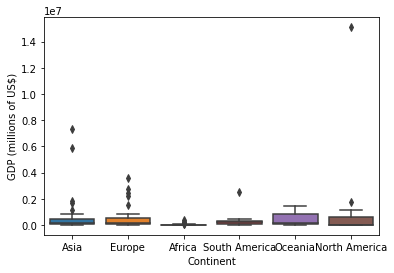

In [23]:
sns.boxplot(x='Continent', y='GDP (millions of US$)',data=data)

Nhận thấy rằng Bắc Mỹ có một quốc gia có GDP rất cao, GDP châu Phi khá thấp, GDP của chây Đại Dương có vẻ đồng đều hơn